In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack
from scipy import signal
import numpy as np
import pandas as pd
import datetime

In [2]:
cd ~/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL/

/home/takeyama/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL


In [3]:
left_hand = pd.read_csv('Cleaning-Conv-left-hand-ags.csv',parse_dates=['Time'])
#left_hand.Time=pd.to_timedelta(left_hand.Time)
left_leg = pd.read_csv('Cleaning-Conv-left-leg-ags.csv',parse_dates=['Time'])
#left_leg.Time=pd.to_timedelta(left_leg.Time)
right_hand = pd.read_csv('Cleaning-Conv-right-hand-ags.csv',parse_dates=['Time'])
#right_hand.Time=pd.to_timedelta(right_hand.Time)
right_leg = pd.read_csv('Cleaning-Conv-right-leg-ags.csv',parse_dates=['Time'])
#right_leg.Time=pd.to_timedelta(right_leg.Time)
west = pd.read_csv('Cleaning-Conv-west-ags.csv',parse_dates=['Time'])
#west.Time=pd.to_timedelta(west.Time)

In [4]:
# labering data -> pandas dateframe
# freq -> sampling time [seconds]
# overlap -> % to freq
def sliding_window(labeling_data,freq, overlap):
    count =0
    start =labeling_data.Time[0]
    goal = start+datetime.timedelta(seconds=freq)
    yield labeling_data[(start <= labeling_data.Time) &(labeling_data.Time< goal)]
                                                        
    count +=1
    start =start+datetime.timedelta(seconds=freq*overlap)
    goal = start+datetime.timedelta(seconds=freq)
    yield labeling_data[(start <= labeling_data.Time) &(labeling_data.Time< goal)]

In [73]:
left_hand_walking=left_hand[left_hand.label=='walking']

In [74]:
left_hand.Time[55470]-left_hand.Time[0]

Timedelta('0 days 00:09:14.700000')

In [75]:
left_hand_walking.reset_index( drop = True )

,Type,Time,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,label
0,ags,2016-04-21 18:06:15.696,0.8226,0.7922,-0.0543,6.162932,1.255939,-0.166330,walking
1,ags,2016-04-21 18:06:15.706,0.8058,0.8437,-0.0582,6.307794,1.042660,-0.396190,walking
2,ags,2016-04-21 18:06:15.716,0.8292,0.9091,-0.0231,6.177593,0.838282,-0.593761,walking
3,ags,2016-04-21 18:06:15.726,0.7628,1.1183,-0.0436,5.675462,0.621337,-0.821352,walking
4,ags,2016-04-21 18:06:15.736,0.7811,1.3112,-0.0370,4.791103,0.325155,-0.960629,walking
5,ags,2016-04-21 18:06:15.746,0.7496,1.3971,-0.0375,3.644247,-0.014835,-1.057670,walking
6,ags,2016-04-21 18:06:15.756,0.7459,1.3967,-0.0302,2.480986,-0.370184,-1.121374,walking
7,ags,2016-04-21 18:06:15.766,0.7171,1.3822,-0.0204,1.350536,-0.683820,-1.206546,walking
8,ags,2016-04-21 18:06:15.776,0.7054,1.3510,-0.0226,0.301069,-1.008102,-1.303586,walking
9,ags,2016-04-21 18:06:15.786,0.7008,1.3061,-0.0141,-0.625002,-1.310568,-1.404816,walking


In [83]:
dlabel=[]
dcos=[]

for i in range(200):
    dd.append([])
    v1 = np.array([left_hand_walking.AccX[i],left_hand_walking.AccY[i],left_hand_walking.AccZ[i]])
    v2 = np.array( [left_hand_walking.AccX[i+1],left_hand_walking.AccY[i+1],left_hand_walking.AccZ[i+1]])
    
    lv1 = np.linalg.norm(v1)
    lv2 = np.linalg.norm(v2)
    
    cos = np.dot(v1,v2)/( lv1*lv2 )
    dlabel.append(i)
    dcos.append(cos)

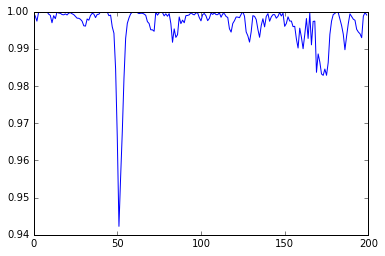

In [84]:
plt.plot(dlabel,dcos)

In [111]:
left_hand_walking.describe()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ
count,1.234800e+04,1.234800e+04,1.234800e+04,12348.000000,12348.000000,12348.000000
mean,3.848397e-07,-4.130224e-07,4.324587e-07,-0.088191,-0.051107,-0.052980
std,4.246562e-01,2.287267e-01,2.115379e-01,0.885376,0.504009,1.198135
min,-1.786226e+00,-7.783750e-01,-1.323120e+00,-3.299894,-2.848726,-3.382972
25%,-1.590100e-02,-1.392750e-01,-5.992000e-02,-0.592888,-0.321751,-0.793863
50%,9.737400e-02,-6.507500e-02,2.748000e-02,-0.135961,-0.070686,-0.073653
75%,2.193240e-01,2.862500e-02,1.049800e-01,0.305258,0.196175,0.578228
max,2.792774e+00,2.389525e+00,3.547380e+00,6.307794,2.385341,5.376661


In [96]:
left_hand_walking.AccX=left_hand_walking.AccX+1.551452

In [93]:
left_hand_walking.AccY=left_hand_walking.AccY+0.431475


In [94]:
left_hand_walking.AccZ=left_hand_walking.AccZ+0.071520

In [119]:
Bleft_hand_walking=left_hand_walking

In [130]:
left_hand_walking=pd.pivot_table(left_hand_walking,values=['AccX','AccY','AccZ','GyrX','GyrY','GyrZ'],index=range(0,12348))

In [129]:
left_hand_walking

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ
0,0.046874,0.360725,-0.12582,6.162932,1.255939,-0.166330
1,0.030074,0.412225,-0.12972,6.307794,1.042660,-0.396190
2,0.053474,0.477625,-0.09462,6.177593,0.838282,-0.593761
3,-0.012926,0.686825,-0.11512,5.675462,0.621337,-0.821352
4,0.005374,0.879725,-0.10852,4.791103,0.325155,-0.960629
5,-0.026126,0.965625,-0.10902,3.644247,-0.014835,-1.057670
6,-0.029826,0.965225,-0.10172,2.480986,-0.370184,-1.121374
7,-0.058626,0.950725,-0.09192,1.350536,-0.683820,-1.206546
8,-0.070326,0.919525,-0.09412,0.301069,-1.008102,-1.303586
9,-0.074926,0.874625,-0.08562,-0.625002,-1.310568,-1.404816


In [159]:
dlabel=[]
dcos=[]

for i in range(6866-1):
    dd.append([])
    v1 = np.array([left_hand_walking.AccX[i],left_hand_walking.AccY[i],left_hand_walking.AccZ[i]])
    v2 = np.array( [left_hand_walking.AccX[i+1],left_hand_walking.AccY[i+1],left_hand_walking.AccZ[i+1]])
    
    lv1 = np.linalg.norm(v1)
    lv2 = np.linalg.norm(v2)
    
    cos = np.dot(v1,v2)/( lv1*lv2 )
    dlabel.append(i)
    dcos.append(cos)

In [160]:
Dot=pd.Series(dcos)
Dot

0       0.998149
1       0.993287
2       0.991394
3       0.998758
4       0.999404
5       0.999965
6       0.999495
7       0.999877
8       0.999949
9       0.998952
10      0.997948
11      0.992378
12      0.996945
13      0.994215
14      0.999759
15      0.998814
16      0.998625
17      0.997348
18      0.997134
19      0.997707
20      0.996694
21      0.998612
22      0.999265
23      0.998024
24      0.996656
25      0.993971
26      0.992308
27      0.991886
28      0.987713
29      0.985529
          ...   
6835    0.999936
6836    0.999899
6837    0.997603
6838    0.998602
6839    0.996937
6840    0.999372
6841    0.996352
6842    0.999913
6843    0.998354
6844    0.997809
6845    0.999941
6846    0.999124
6847    0.999969
6848    0.996894
6849    0.998876
6850    0.997564
6851    0.999169
6852    0.984912
6853    0.997715
6854    0.999909
6855    0.998619
6856    0.996225
6857    0.998676
6858    0.997074
6859    0.995739
6860    0.999760
6861    0.993281
6862    0.9993

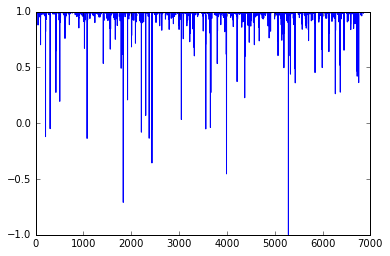

In [161]:
plt.plot(dlabel,dcos)

In [178]:
Dot.mean()

0.98215357750067289

In [179]:
Dot.var()

0.0054078598256130893

In [180]:
DotU0=Dot[Dot<0.98215357750067289-0.0054078598256130893]

In [181]:
DotU0.index

Int64Index([  50,   51,   52,   53,   73,   86,   88,   89,   90,  103,
            ...
            6723, 6724, 6725, 6756, 6801, 6802, 6803, 6818, 6819, 6820],
           dtype='int64', length=923)

In [182]:
for i in DotU0.index:
    print left_hand.ix[i,:].Time

    

2016-04-21 18:06:16.196000
2016-04-21 18:06:16.206000
2016-04-21 18:06:16.216000
2016-04-21 18:06:16.226000
2016-04-21 18:06:16.426000
2016-04-21 18:06:16.556000
2016-04-21 18:06:16.576000
2016-04-21 18:06:16.586000
2016-04-21 18:06:16.596000
2016-04-21 18:06:16.726000
2016-04-21 18:06:16.736000
2016-04-21 18:06:16.746000
2016-04-21 18:06:16.756000
2016-04-21 18:06:16.766000
2016-04-21 18:06:17.016000
2016-04-21 18:06:17.436000
2016-04-21 18:06:17.446000
2016-04-21 18:06:17.466000
2016-04-21 18:06:17.636000
2016-04-21 18:06:17.656000
2016-04-21 18:06:17.756000
2016-04-21 18:06:17.766000
2016-04-21 18:06:17.776000
2016-04-21 18:06:17.786000
2016-04-21 18:06:17.796000
2016-04-21 18:06:17.826000
2016-04-21 18:06:17.836000
2016-04-21 18:06:17.886000
2016-04-21 18:06:18.396000
2016-04-21 18:06:18.586000
2016-04-21 18:06:18.596000
2016-04-21 18:06:18.606000
2016-04-21 18:06:18.736000
2016-04-21 18:06:19.556000
2016-04-21 18:06:19.886000
2016-04-21 18:06:19.896000
2016-04-21 18:06:19.906000
2